# Predicting the survival of passengers on the Titanic using random forest machine learning models. 
### (Also did some unnecessary data imputation and feature engineering)

  - The goal of this project is to predict which passengers on the Titanic will survive based on pre-boarding characteristics
  - While the data is mostly clean, regression imputation and a little feature engineering will be necessary to get the most out of the data
  - The features include socioeconomic markers such as passenger class and the ticket fare, as well as biological features such as sex, age, and child companions
  - Under the circumstances of a sinking ship with limited life boats, these social factors would result in a bias in terms of survivability relative to a random selection of passengers
  - The training set will consist of 1/3 of the data. The test set will consist of the remaining 2/3.
  - Dataset from the classic kaggle competition https://www.kaggle.com/c/titanic/data


# Table of Contents
1. Data Exploration
    1. Checking data types
    2. Correllation coefficient heatmap
    3. Correllation coefficient barplot
    4. Handling null values
2. Linear Regression Imputation
3. K-Nearest Neighbors Imputation

In [2279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import chdir
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score # for checking error of the model

## Data exploration
- Loading and exploring the data sets to determine if any data cleaning is necessary, or if any useful additional features can be created from the dataset

In [2280]:
chdir('C:\\Data_files')
test= pd.read_csv('titanic_test.csv')
train = pd.read_csv('titanic_train.csv')
base_train = train.copy()
base_test = test.copy()
X = train.copy()
y = test.copy()
print(test.shape, train.shape, gender.shape)

(418, 11) (891, 12) (418, 2)


In [2281]:
base_test.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [2282]:
# Randomly sorting the Xing data to avoid position bias
X = X.sample(frac=1)
X.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [2283]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2284]:
# Non-useful features
X = X.drop(['PassengerId', 'Ticket'], axis=1)
X.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
86,0,3,"Ford, Mr. William Neal",male,16.00,1,3,34.3750,NaN,S
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,C22 C26,S


### Checking data types

In [2285]:
types = {col: X[col].dtypes for col in X.columns}
print(types)

{'Survived': dtype('int64'), 'Pclass': dtype('int64'), 'Name': dtype('O'), 'Sex': dtype('O'), 'Age': dtype('float64'), 'SibSp': dtype('int64'), 'Parch': dtype('int64'), 'Fare': dtype('float64'), 'Cabin': dtype('O'), 'Embarked': dtype('O')}


In [2286]:
# Checking the number of unique labels in each class
for col in X.columns:
    print(str(col),X[col].value_counts().unique())

Survived [549 342]
Pclass [491 216 184]
Name [1]
Sex [577 314]
Age [30 27 26 25 24 23 22 20 18 17 15 14 13 12 11 10  9  8  7  6  5  4  3  2
  1]
SibSp [608 209  28  18  16   7   5]
Parch [678 118  80   5   4   1]
Fare [43 42 38 34 31 24 18 16 15 13 12  9  8  7  6  5  4  3  2  1]
Cabin [4 3 2 1]
Embarked [644 168  77]


### Correllation coefficient heatmap for the features in the training set
- 

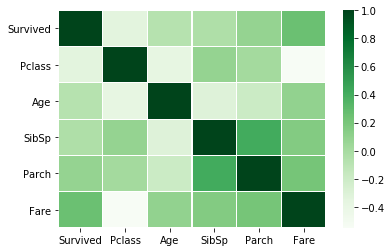

In [2287]:
features = X.columns
sns.heatmap(X[features].corr(), linewidth=0.02, cmap='Greens')

### Barplot showing the relationship between each feature and survival
- A somewhat strong inverse correlation is observed between Passenger Class and survival - that is, lower class numbers (so 1st class) have higher survival odds, which is to be expected if wealth is favorable to survival odds

          Survived
Pclass   -0.338481
Age      -0.077221
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
Survived  1.000000


Text(0, 0.5, 'Correllation coefficient r')

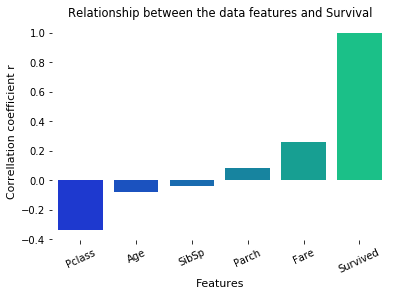

In [2288]:
corrs = X[features].corr().sort_values('Survived', ascending=True)
to_plot = pd.DataFrame(corrs['Survived'], corrs.index)
print(to_plot)
sns.barplot(x = to_plot.index, y = 'Survived', data=to_plot, palette='winter')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=25)
plt.title('Relationship between the data features and Survival', size=11.5)
plt.xlabel('Features', size=11)
plt.ylabel('Correllation coefficient r', size=11)

### There are large outliers in the 'Fare' feature
- Will likely want to deal with them for greater accuracy

In [2289]:
print('Age statistics:\n', X['Age'].describe(), 'Fare statistics:\n', X['Fare'].describe())

Age statistics:
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 Fare statistics:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


## Handling null values
- The 'Cabin' feature consists primarily of null values and will need to be dealt with
- The missing data in the 'Age' feature will also need to be dealt with
- Will simply remove the 2 rows containing missing data in 'Embarked'

In [2290]:
for col in X.columns:
    print(col + ':', X[col].isnull().sum())

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Cabin: 687
Embarked: 2


In [2291]:
# forward filling the 2 missing values in 'Embarked'
X['Embarked'] = X['Embarked'].fillna(method='ffill')

In [2292]:
for col in X.columns:
    print(col + ':', X[col].isnull().sum())

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Cabin: 687
Embarked: 0


# Linear regression imputation for missing data in the 'Age' feature
- The heatmap suggests that the strongest linear relationship exists between 'Age' and 'Fare', and fortunately both variables are continuous. Therefore will use 'Fare' for regression imputation of missing values in 'Age'.
- Results from regression imputation look fairly poor - mean absolute error of approximately 11 years, and all values falling within a few years of the mean.
- KNN imputation would likely be more effective here

In [2293]:
X_lr = X[['Fare', 'Age']].copy()
X_lr_missing = X_lr[X_lr['Age'].isnull() == True]
X_lr_missing = X_lr_missing.drop('Age', axis=1)
X_lr = X_lr.dropna(axis=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_lr[['Fare']], X_lr['Age'])
predictions = lr.predict(X_lr_missing)
print(predictions[:18], '\nLength:', len(predictions), '\nMean:', np.mean(predictions), '\nMin:', np.min(predictions), '\nMax:', np.max(predictions), '\nStd Dev:', np.std(predictions))


[28.99197736 28.9832961  29.16547325 28.78419685 28.98857026 28.97538488
 28.97483636 30.27403419 29.39731708 28.98857026 28.99878893 28.98857026
 30.10273499 28.99241511 28.99241511 28.99241511 29.5674085  29.60169049] 
Length: 177 
Mean: 29.3685351523232 
Min: 28.78419684502346 
Max: 34.78420466901207 
Std Dev: 0.8381799146193877


In [2294]:
# 
lr2 = LinearRegression()
X_lr2 = X_lr.copy()
training = X_lr2[:int(len(X_lr)/2)]
testing = X_lr2[int(len(X_lr)/2):]
lr2.fit(training[['Fare']], training['Age'])
predictions = lr2.predict(testing[['Age']])
mae = np.mean(np.abs(predictions - testing['Age'])) # matrix subtraction
lr2_mse = mse(predictions, testing['Age'])
lr2_rmse = np.sqrt(mse(predictions, testing['Age']))
print('MAE:', mae, '\nmse:', lr2_mse, '\nRMSE:', lr2_rmse)

MAE: 10.823891685047444 
mse: 200.55422573553543 
RMSE: 14.16171690634774


In [2295]:
print('Equation of the regression line:', lr.intercept_,'+', float(lr.coef_),'x')

Equation of the regression line: 28.78419684502346 + 0.026370762878754464 x


# K-Nearest Neighbors Imputation

In [2296]:
#def knn_imputation(df, ):

### A greater than random proportion of passengers with cabin data survived the Titanic (approx 66.7%) vs those with missing cabin data (approx. 33%)
- Thus, the presence of missing data with respect to the Cabin may itself be predictive of passenger survival
- Perhaps data was not kept for cheaper cabins. Or perhaps cabin data was not kept for less important passengers

In [2297]:
cabin_df = X[X['Cabin'].notnull()]
# removing the cabin column due to excessive null values
print(cabin_df['Survived'].value_counts(normalize=True))

1    0.666667
0    0.333333
Name: Survived, dtype: float64


# Feature engineering
- Creating new feature Cabin_data
- Might be worth creating a new feature married/single based on the 'Name' column data, which includes Miss and Mrs titles

### def create_cabin_data_col(df):
- Creates the new encoded column Cabin_data while dropping the previous 'Cabin' column
- 0: Did not have cabin data
- 1: Did have cabin data

In [2298]:
def create_cabin_data_col(df):
    df['Cabin_data'] = df['Cabin']
    not_null_cabin_vals = df[df['Cabin'].notnull()]
    not_null_cabin_vals = not_null_cabin_vals['Cabin'].values # creates a list of values in cabin to replace
    df = df.drop(['Cabin'], axis=1)
    df['Cabin_data'] = df['Cabin_data'].replace(np.NaN, 0)
    df['Cabin_data'] = df['Cabin_data'].replace(not_null_cabin_vals, value=1)
    return df

In [2299]:
# 1 signifies a passenger which survived the Titanic in the respective cabin data available / not available categories
cabin_1 = X[X['Cabin'].notnull()]
cabin_0 = X[X['Cabin'].isnull()]
print('No cabin data available:\n', cabin_0['Survived'].value_counts(normalize=True), '\n', 'Cabin data available:\n', cabin_1['Survived'].value_counts(normalize=True))

No cabin data available:
 0    0.700146
1    0.299854
Name: Survived, dtype: float64 
 Cabin data available:
 1    0.666667
0    0.333333
Name: Survived, dtype: float64


### Correllation barplot with the engineered Cabin_data feature
- The strongest two positive correlations are between fare price and the engineered Cabin_data feature
- While wealth being predictive is not surprising, it is not entirely clear why the engineered feature is predictive

Text(0, 0.5, 'Correllation coefficient r')

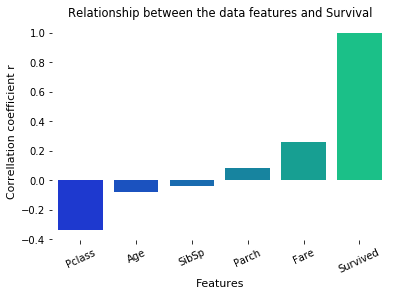

In [2300]:
plot_features = X.drop(['Name'], axis=1).columns
corrs = X[plot_features].corr().sort_values('Survived', ascending=True)
to_plot = pd.DataFrame(corrs['Survived'], corrs.index)
sns.barplot(x = to_plot.index, y = 'Survived', data=to_plot, palette='winter')
sns.despine(left=True, bottom=True)
plt.xticks(rotation=25)
plt.title('Relationship between the data features and Survival', size=11.5)
plt.xlabel('Features', size=11)
plt.ylabel('Correllation coefficient r', size=11)

# Creating the Random Forest Classifier model
- Using a Random Forest Classifier because the goal is to predict a binary outcome - survived or died - rather than a continuous outcome
- Chose a Random Forest model over a logistic regression model as all of the relationships in the data are unlikely to be linear
- Will nonetheless compare the results to a logistic regression model at the end

In [2301]:
def random_forest(traindf, testdf, features, base_test_df, depth = 15, class_weights = None):
    rfc = RandomForestClassifier(max_depth = depth, random_state = 1, class_weight = class_weights)
    rfc.fit(traindf[features], traindf[['Survived']])
    prediction = rfc.predict(testdf)
    #roc_auc = roc_auc_score(testdf['Survived'], prediction)
    output = pd.DataFrame({'PassengerId': base_test_df.PassengerId, 'Survived': prediction})
    csv = output.to_csv('titanic_prediction.csv', index=False)
    return csv

In [2302]:
print(base_test.shape)
base_train = base_train.drop(['Name', 'Cabin', 'Ticket'], axis=1).dropna()
base_test = base_test.drop(['Name', 'Cabin', 'Ticket'], axis=1) # don't want to dropna for the test df because columns with missing data are being ignored
print(base_test.shape)

(418, 11)
(418, 8)


In [2303]:
base_train = pd.get_dummies(base_train)
base_test = pd.get_dummies(base_test)

In [2304]:
#print(base_train.shape, base_test.shape)
#print(base_test)
#print(base_test.PassengerId)
print(base_test.shape)

(418, 11)


In [2305]:
base_features = base_train.columns
base_features = ['Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
print(base_features)
test_features = ['PassengerId', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
base_test_df = base_test[test_features]
base_test = base_test[base_features]
#print(base_test)

['Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [2306]:
print(random_forest(base_train, base_test, base_features, base_test_df, class_weights = 'balanced'))

C:\Users\jcham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


None


### transform_features(df):
- Transforms the features in the dataframe using the feature engineering, imputation, and dummy variable functions to prepare the dataframes for machine learning

In [2307]:
def transform_features(df):
    df = create_cabin_data_col(df)

## Comparing list-wise deletion vs regression imputation vs KNN imputation